# Importing Necessary Libraries

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.tree import *
from xgboost import *
from catboost import *
from lightgbm import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.metrics import *
import joblib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [171]:
heart = pd.read_csv("E:/heart.csv")

In [172]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [173]:
# Variable Description
var_description = pd.DataFrame({
    'Variable': heart.columns.tolist(),
    'Description': ['Age of the patient (in years)', 'Sex of the patient (1 = male, 0 = female)', \
                    'Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)', \
                    'Resting blood pressure (in mm Hg on admission to the hospital)', 'Serum cholesterol in mg/dl', \
                    'Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', \
                    'Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing', \
                    'Maximum heart rate achieved', 'Exercise-induced angina (1 = yes; 0 = no)', 'Oldpeak', 'ST segment', \
                    'Major vessels', 'Thal', 'Heart disease']
})
var_description

,Variable,Description
0,age,Age of the patient (in years)
1,sex,"Sex of the patient (1 = male, 0 = female)"
2,cp,"Chest pain type (0 = typical angina, 1 = atypi..."
3,trestbps,Resting blood pressure (in mm Hg on admission ...
4,chol,Serum cholesterol in mg/dl
5,fbs,Fasting blood sugar > 120 mg/dl (1 = true; 0 =...
6,restecg,Resting electrocardiographic results (0 = norm...
7,thalach,Maximum heart rate achieved
8,exang,Exercise-induced angina (1 = yes; 0 = no)
9,oldpeak,Oldpeak


In [174]:
heart.shape

(303, 14)

In [175]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [176]:
heart.duplicated().any()

True

In [177]:
heart[heart.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [178]:
heart = heart.drop_duplicates()

In [179]:
heart.shape

(302, 14)

In [180]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [181]:
# Categorical Columns
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [182]:
# Convert Data type of Categorical variable to Object
for colname in cat_cols:
    heart[colname] = heart[colname].astype('object')

In [183]:
# Create a DataFrame with unique values for each categorical column

unique_df = {
    'Variable': cat_cols,
    'Datatype': [heart[col].dtype for col in cat_cols],
    'Unique Values': [heart[col].unique() for col in cat_cols]
}

summary_df = pd.DataFrame(unique_df)
summary_df

,Variable,Datatype,Unique Values
0,sex,object,"[1, 0]"
1,cp,object,"[3, 2, 1, 0]"
2,fbs,object,"[1, 0]"
3,restecg,object,"[0, 1, 2]"
4,exang,object,"[0, 1]"
5,slope,object,"[0, 2, 1]"
6,ca,object,"[0, 2, 1, 3, 4]"
7,thal,object,"[1, 2, 3, 0]"
8,target,object,"[1, 0]"


# Exploratory Data Analysis

In [184]:
# Summary of Categoricall Variables
heart.describe(include='object').T

,count,unique,top,freq
sex,302,2,1,206
cp,302,4,0,143
fbs,302,2,0,257
restecg,302,3,1,151
exang,302,2,0,203
slope,302,3,2,141
ca,302,5,0,175
thal,302,4,2,165
target,302,2,1,164


In [185]:
# Summary of Numerical Variables
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [186]:
# Unique values count of Target Variable
heart['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

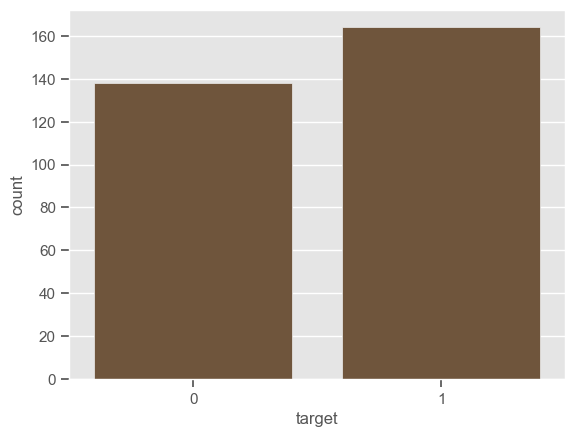

In [187]:
# Plotting Unique values count of Target Variable
sns.countplot(x = 'target', data = heart, color = '#775533')
plt.show()

In [189]:
# Numerical and Categorical Features
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_features = ['age','trestbps','chol','thalach', 'oldpeak']

In [212]:
heart[categorical_features].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,206,143,257,151,203,141,175,165


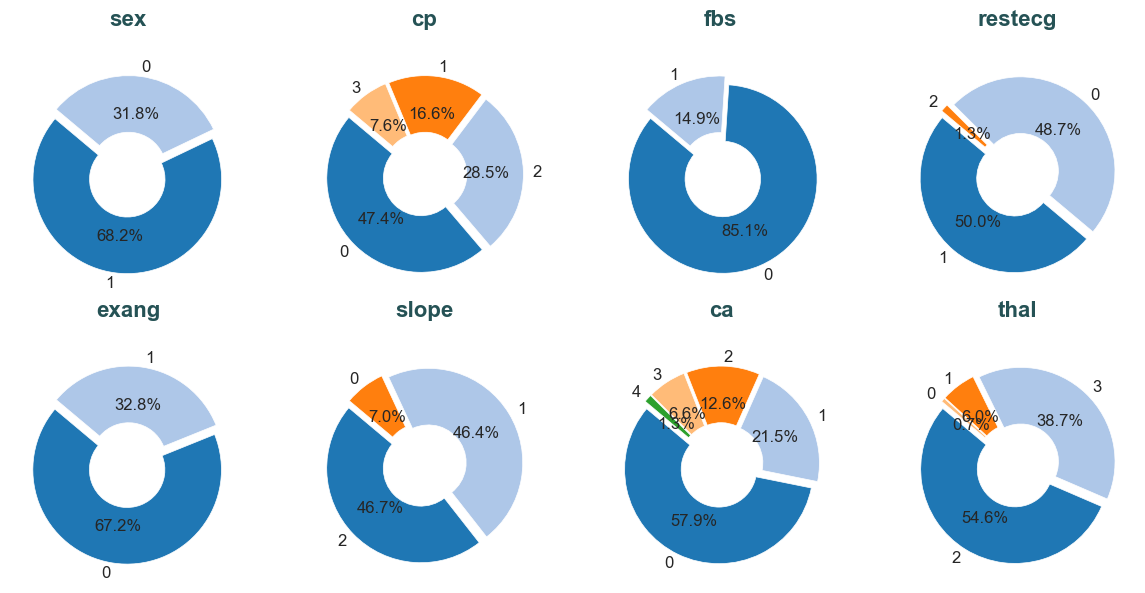

In [389]:
# Pie Plot of Categorical Features
fig = plt.figure(figsize=(12, 6), dpi=100)

for i, col in enumerate(categorical_features):
    col_counts = heart[col].value_counts()

    plt.subplot(2, 4, i + 1)
    plt.pie(col_counts.values,
            labels=col_counts.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.tab20.colors,
            explode=[0.05] * len(col_counts.index),
            wedgeprops=dict(width=0.6, edgecolor='w'),
            shadow=False,
            textprops={'fontsize': 12, 'rotation': 0})
    plt.title(f'{col}\n', fontsize=16, fontweight='bold', color='#255255')

plt.tight_layout()
plt.show()

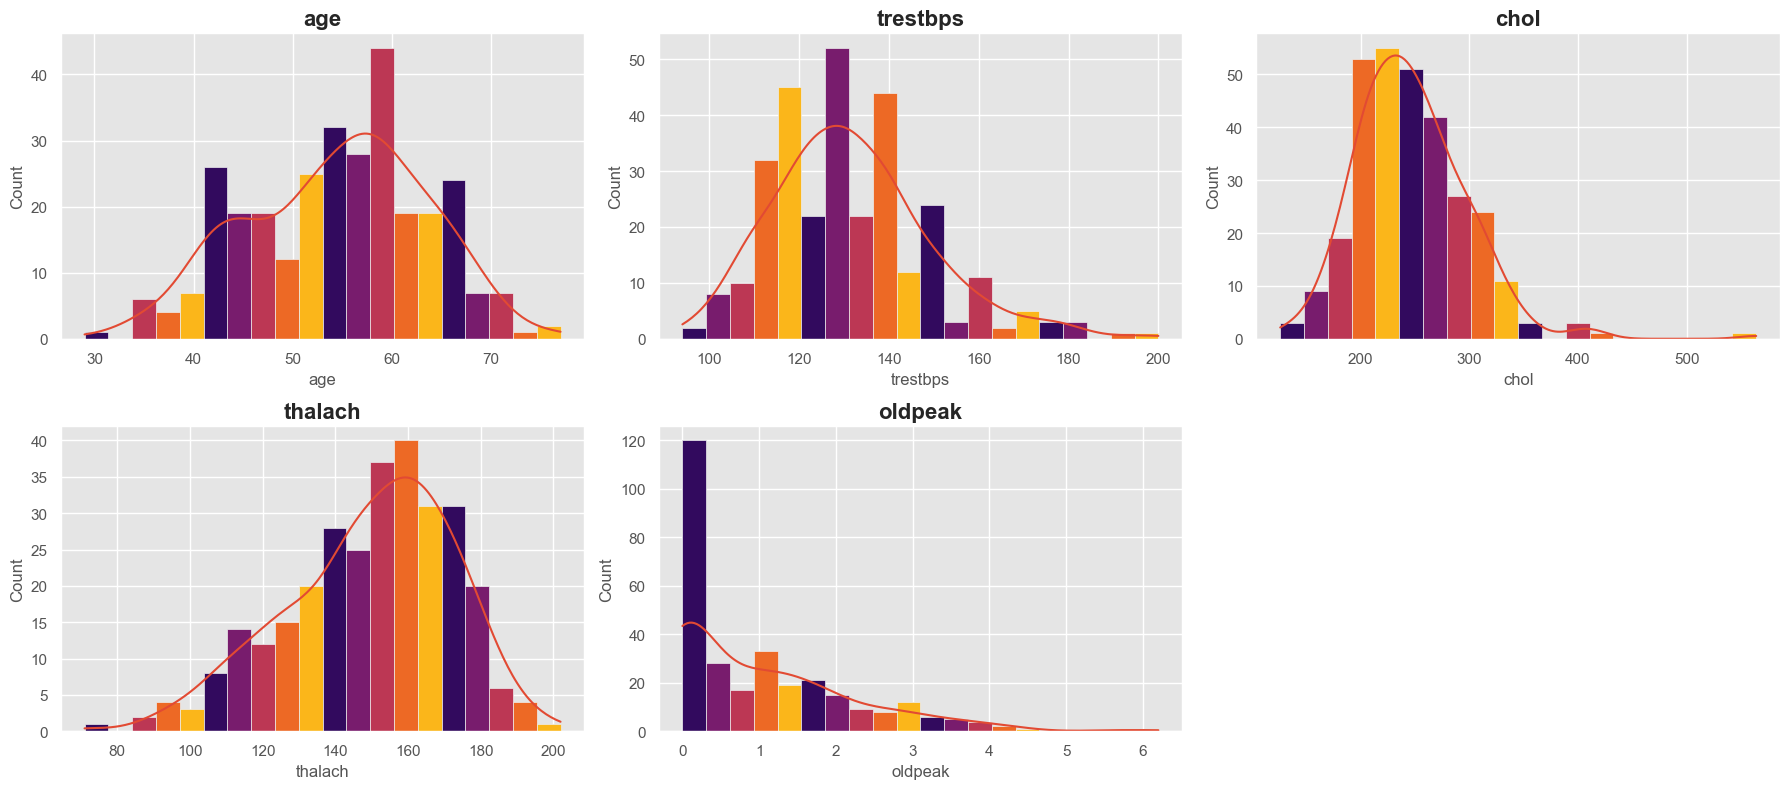

In [390]:
# Histogram numerical features
plt.figure(figsize=(18, 8))
colors = sns.color_palette("inferno", len(numerical_features))

for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    hist_plot = sns.histplot(x=col, data=heart, bins=20, kde=True)

    for j, patch in enumerate(hist_plot.patches):
        patch.set_facecolor(colors[j % len(colors)])

    plt.title(col, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

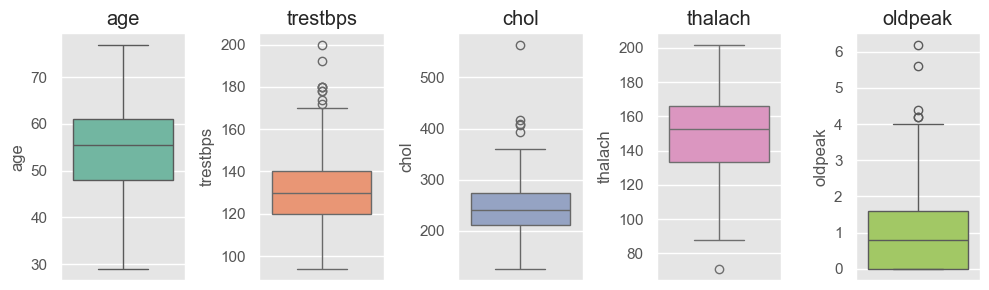

In [381]:
# BoxPlots
colors = sns.color_palette("Set2", len(numerical_features))
plt.figure(figsize=(10, 3))

for i in range(len(numerical_features)):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=numerical_features[i], data=heart, color=colors[i])
    plt.title(numerical_features[i])

plt.tight_layout()
plt.show()

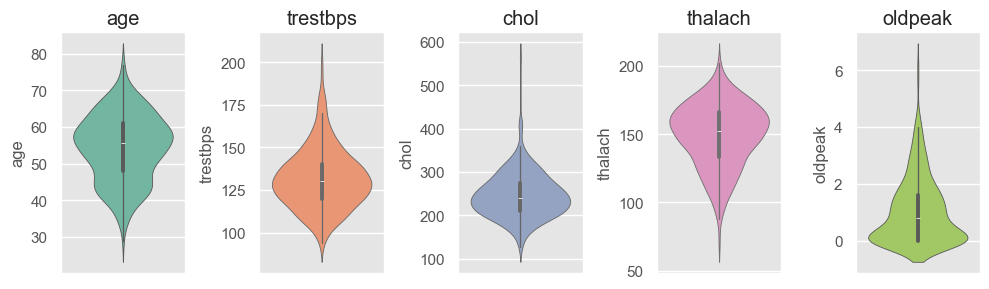

In [382]:
# Violin Plots
colors = sns.color_palette("Set2", len(numerical_features))
plt.figure(figsize=(10, 3))

for i in range(len(numerical_features)):
    plt.subplot(1, 5, i + 1)
    sns.violinplot(y=numerical_features[i], data=heart, color=colors[i])
    plt.title(numerical_features[i])

plt.tight_layout()
plt.show()

<Axes: >

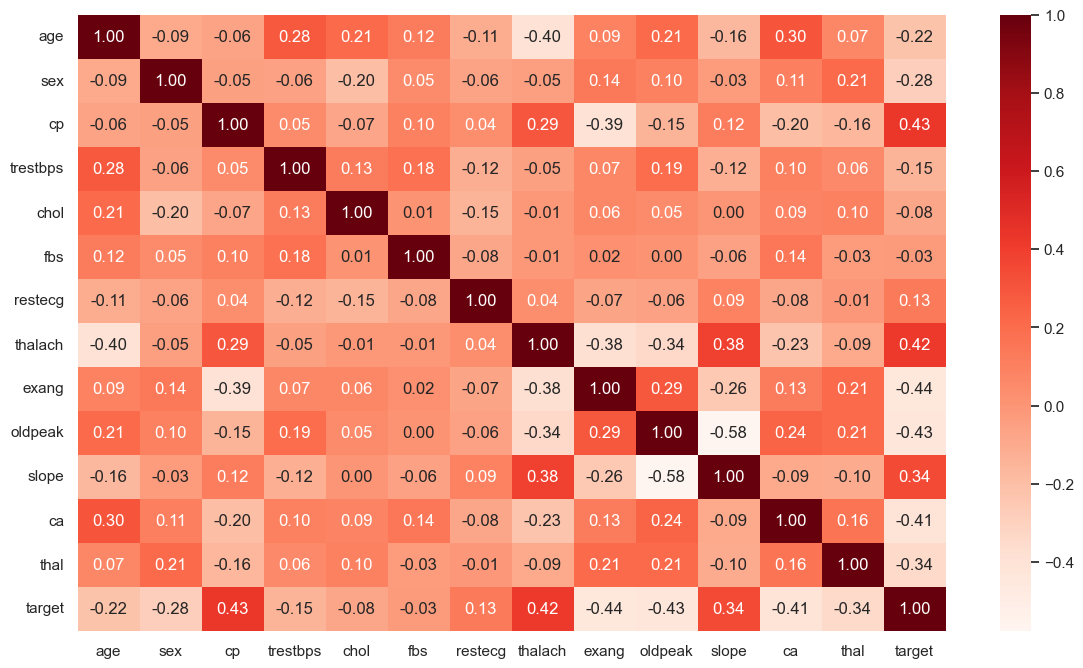

In [260]:
# Correlation Plot
plt.figure(figsize =(14, 8))
sns.heatmap(heart.corr(), annot = True, fmt = '.2f', cmap = 'Reds')

In [294]:
# Convert Data type of Categorical variable to Integer
for colname in cat_cols:
    heart[colname] = heart[colname].astype('int64')

In [295]:
# Feature-Target Ddistribution
X = heart.drop('target', axis=1).astype('int64')
y = heart['target']

In [296]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,0,2,0,2
4,57,0,0,120,354,0,1,163,1,0,2,0,2


# Train-Test Split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, shuffle=True, stratify = y, random_state = 52)

In [299]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((241, 13), (241,), (61, 13), (61,))

In [300]:
for i in numerical_features:
    X_train[i] = MinMaxScaler().fit_transform(X_train[[i]])

for i in numerical_features:
    X_test[i] = StandardScaler().fit_transform(X_test[[i]])

# Model Evaluation

In [315]:
models = {
    'Logistic Regression': LogisticRegression(random_state=52),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=52),
    'Random Forest Classifier': RandomForestClassifier(random_state=52),
    'Support Vector Classifier': SVC(kernel = 'linear', random_state=52),
    'XGBoost Classifier': XGBClassifier(random_state=52, n_jobs=-1),
    'LightGBM Classifier': LGBMClassifier(random_state=52, n_jobs=-1, verbose=-1),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state = 52),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=5, weights = 'distance'),
    'Gaussian Naive Bayes Classifier': GaussianNB()
}

In [316]:
def model_performance(models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, color='viridis'):
    performance_metrics = []
    all_fpr = []
    all_tpr = []
    all_auc = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Get predictions and probabilities
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
        
        # Print and calculate performance metrics
        print('='*100)
        print(model_name)
        print('='*100)
        print('Training data accuracy:', model.score(X_train, y_train))

        metrics = {
            'Model': model_name,
            'ACC': model.score(X_train, y_train),
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'ROC-AUC': roc_auc_score(y_test, y_proba),
            'Kappa': cohen_kappa_score(y_test, y_pred),
            'MCC': matthews_corrcoef(y_test, y_pred)
        }
        performance_metrics.append(metrics)
        
        # Print classification report
        print('\nClassification Report:\n', classification_report(y_test, y_pred))
        
        # Plot Confusion Matrix
        plt.figure(figsize=(5, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=plt.cm.cividis)
        plt.title('Confusion Matrix', size=15)
        plt.show()
        
        # Plot ROC Curve
        if hasattr(model, "predict_proba"):
            plt.figure(figsize=(6, 4))
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = roc_auc_score(y_test, y_proba)
            plt.plot(fpr, tpr, label='ROC_AUC = {:.2f}'.format(roc_auc))
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.title('ROC Curve for {}'.format(model_name))
            plt.show()
            
            all_fpr.append(fpr)
            all_tpr.append(tpr)
            all_auc.append(roc_auc)
        
        # Plot Precision-Recall Curve
        if hasattr(model, "predict_proba"):
            precision, recall, _ = precision_recall_curve(y_test, y_proba)
            plt.figure(figsize=(6, 4))
            plt.plot(recall, precision, marker='.')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve for {}'.format(model_name))
            plt.show()
        
        # Plot Feature Importance
        if hasattr(model, "feature_importances_"):
            plt.figure(figsize=(10, 4))
            importance = model.feature_importances_
            sorted_idx = np.argsort(importance)
            if isinstance(X_train, pd.DataFrame):
                feature_names = X_train.columns
            else:
                feature_names = np.arange(len(importance))
            sns.barplot(x=importance[sorted_idx], y=feature_names[sorted_idx], palette=color)
            plt.xlabel("Feature Importance")
            plt.ylabel("Feature")
            plt.title("Feature Importance for {}".format(model_name))
            plt.show()
    
    # Plot ROC curves for all models
    plt.figure(figsize=(6, 6)) #figsize=(6, 6), 
    for fpr, tpr, auc, model_name in zip(all_fpr, all_tpr, all_auc, models.keys()):
        plt.plot(fpr, tpr, label='{} (ROC_AUC = {:.3f})'.format(model_name, auc), alpha=0.75)

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend(loc="best", fontsize='x-small')
    #plt.title('ROC Curve for All Models', size=15)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    print('='*120)

    performance_df = pd.DataFrame(performance_metrics)
    return performance_df.sort_values(by=['MCC', 'ROC-AUC'], ascending=False)
    print('=' * 50, 'The End', '=' * 50)

In [317]:
def performance_score(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred
    fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
    scores = {
        'MCC': matthews_corrcoef(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        #'AUC': auc(fpr, tpr),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'ACC': [model.score(X_train, y_train)],
        'Accuracy': [accuracy_score(y_test, y_pred)],
        'Precision': [precision_score(y_test, y_pred)],
        'Recall': [recall_score(y_test, y_pred)],
        'F1': [f1_score(y_test, y_pred)]
        }
    
    return pd.DataFrame(scores)

Logistic Regression
Training data accuracy: 0.8506224066390041

Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       1.00      0.03      0.06        33

    accuracy                           0.48        61
   macro avg       0.73      0.52      0.35        61
weighted avg       0.76      0.48      0.32        61



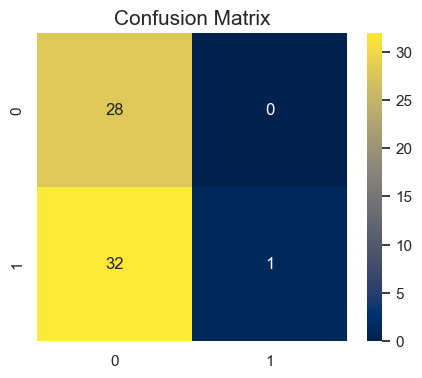

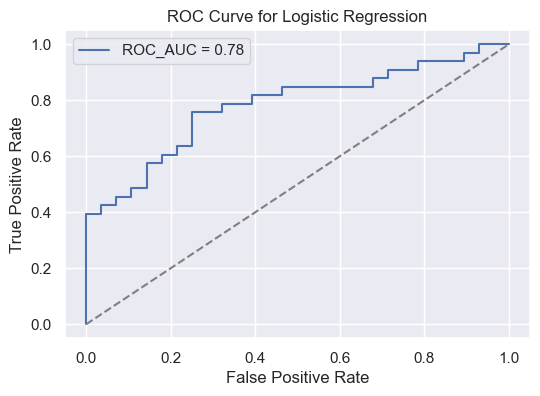

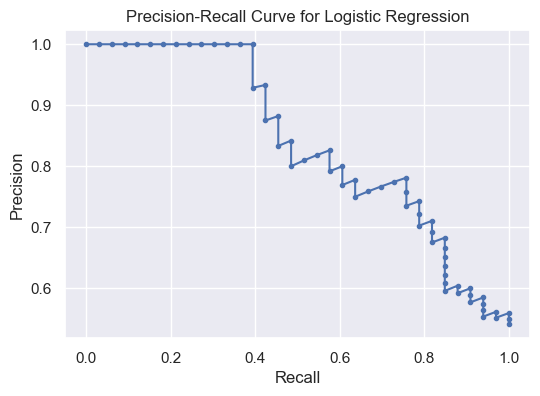

Decision Tree Classifier
Training data accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.96      0.71        28
           1       0.92      0.36      0.52        33

    accuracy                           0.64        61
   macro avg       0.74      0.66      0.62        61
weighted avg       0.76      0.64      0.61        61



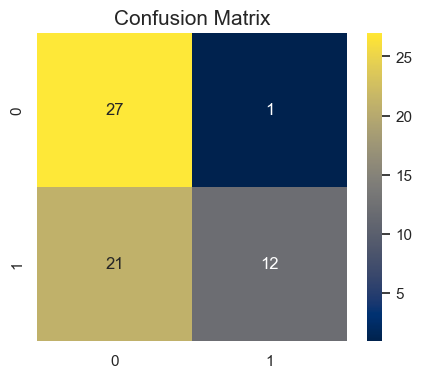

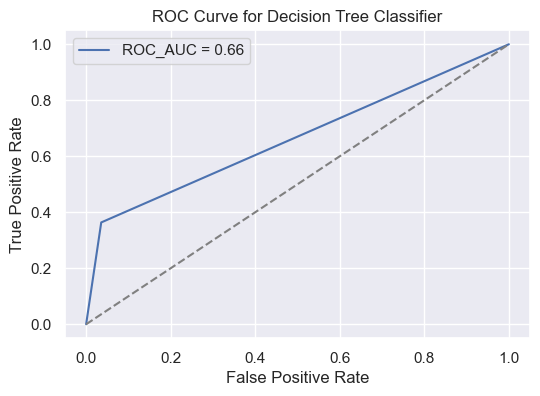

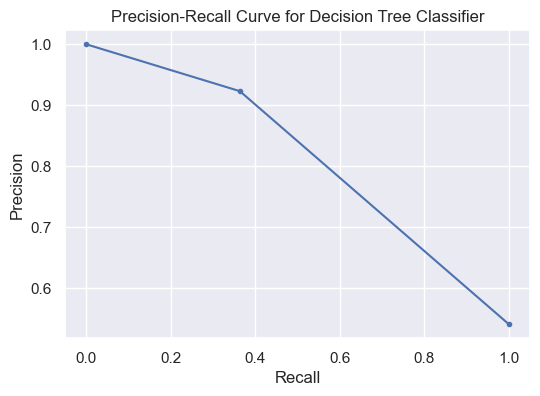

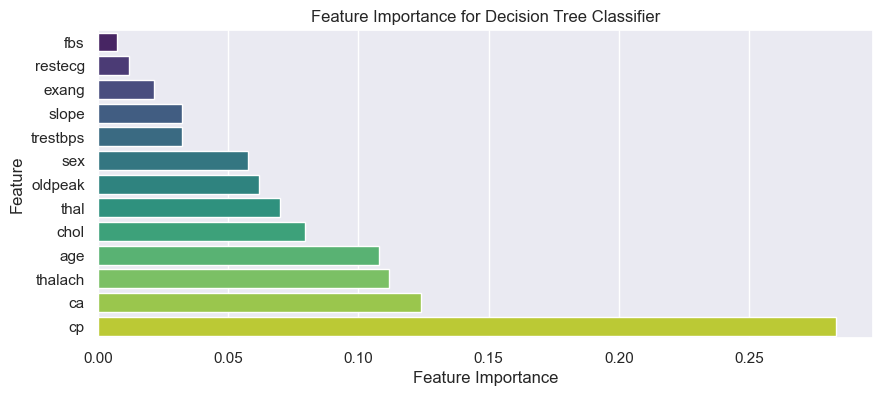

Random Forest Classifier
Training data accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



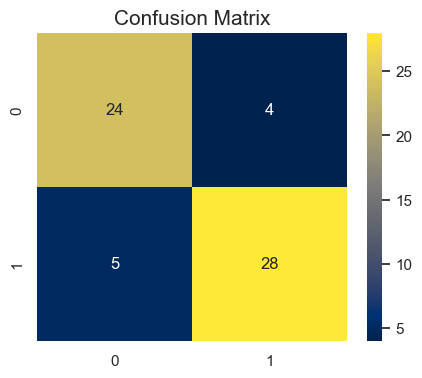

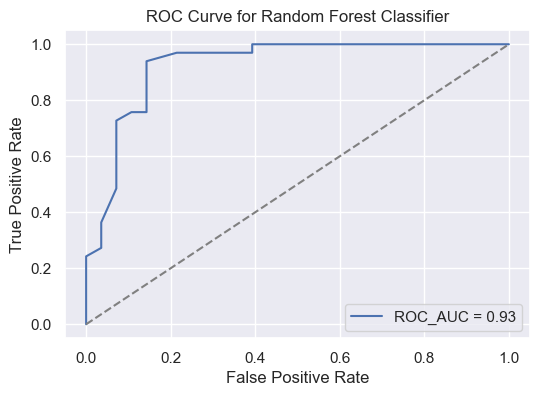

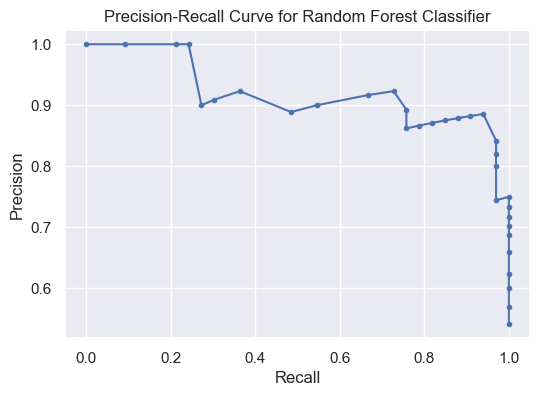

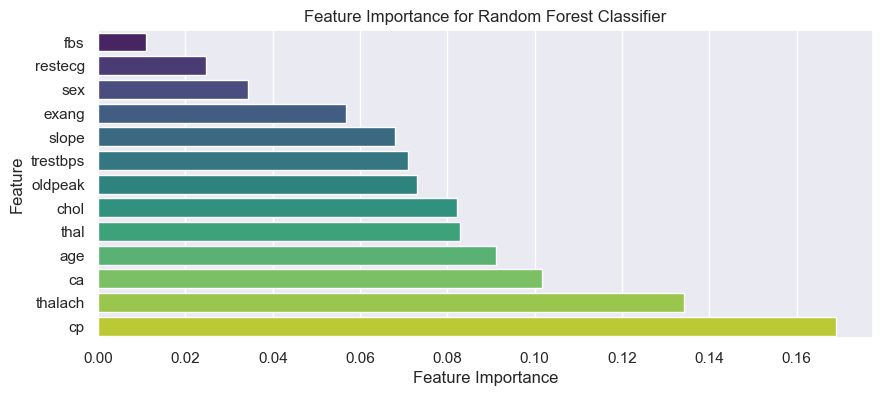

Support Vector Classifier
Training data accuracy: 0.8506224066390041

Classification Report:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63        28
           1       0.00      0.00      0.00        33

    accuracy                           0.46        61
   macro avg       0.23      0.50      0.31        61
weighted avg       0.21      0.46      0.29        61



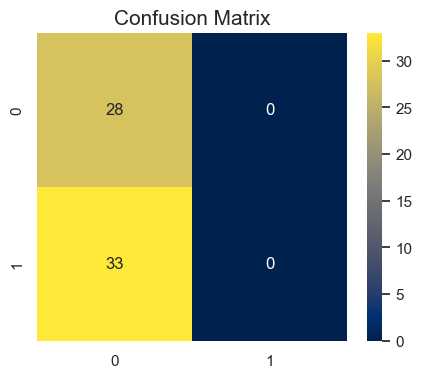

XGBoost Classifier
Training data accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.93      0.70        28
           1       0.87      0.39      0.54        33

    accuracy                           0.64        61
   macro avg       0.72      0.66      0.62        61
weighted avg       0.73      0.64      0.62        61



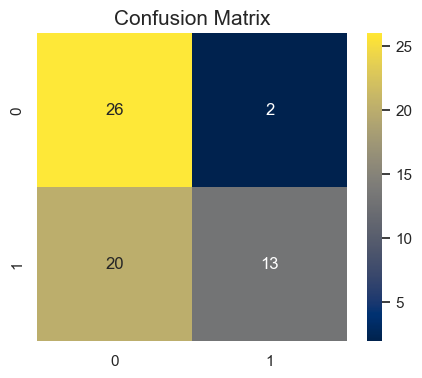

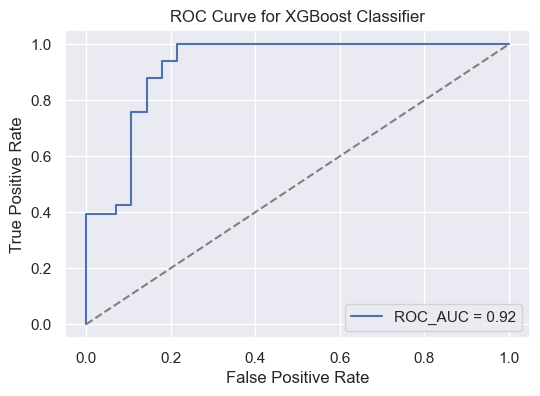

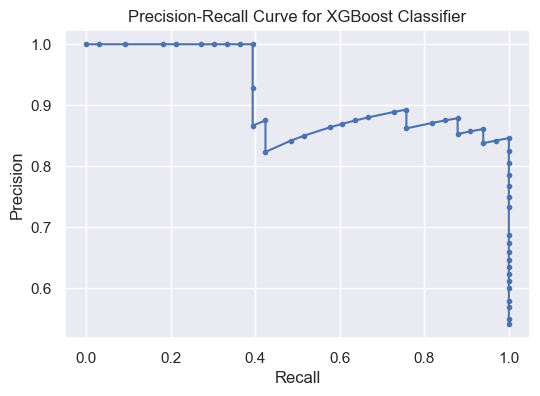

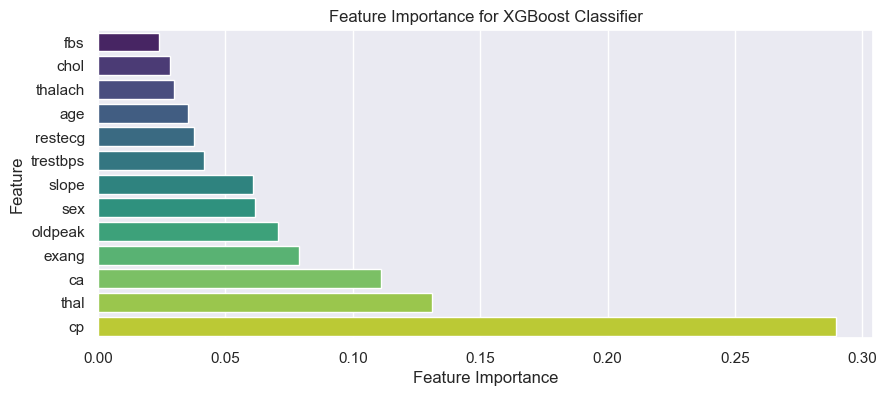

LightGBM Classifier
Training data accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        28
           1       0.88      0.70      0.78        33

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61



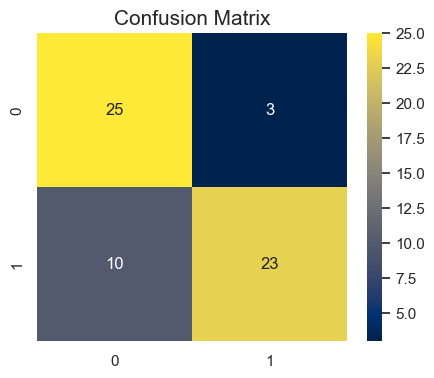

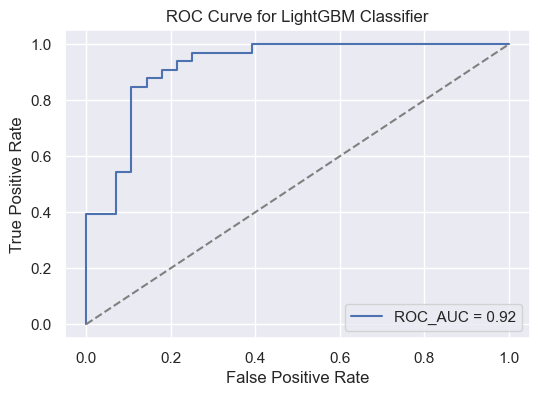

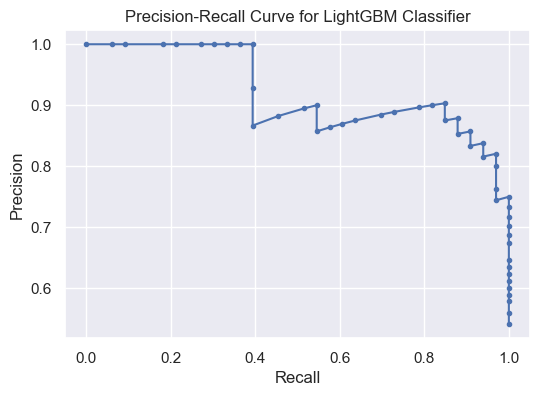

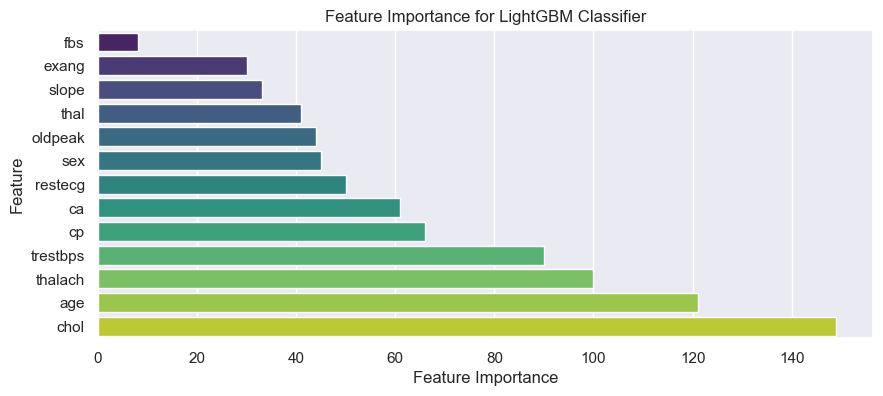

Gradient Boosting Classifier
Training data accuracy: 0.995850622406639

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.82      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



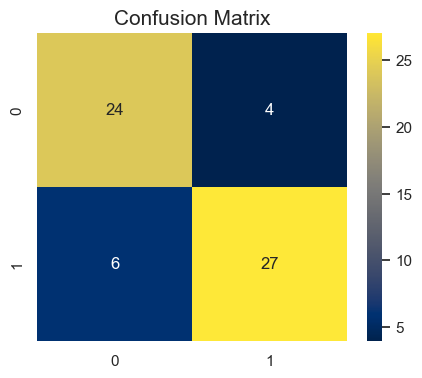

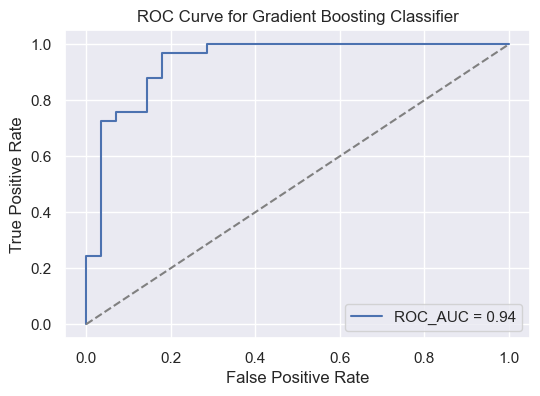

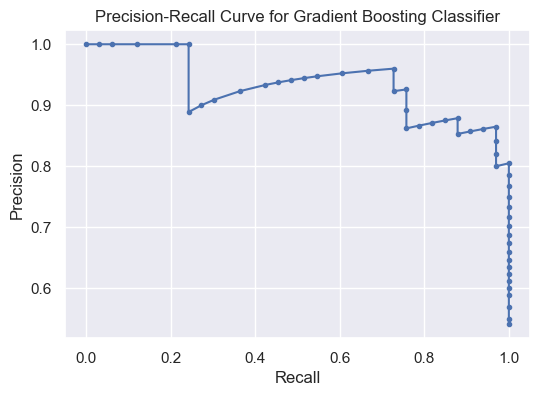

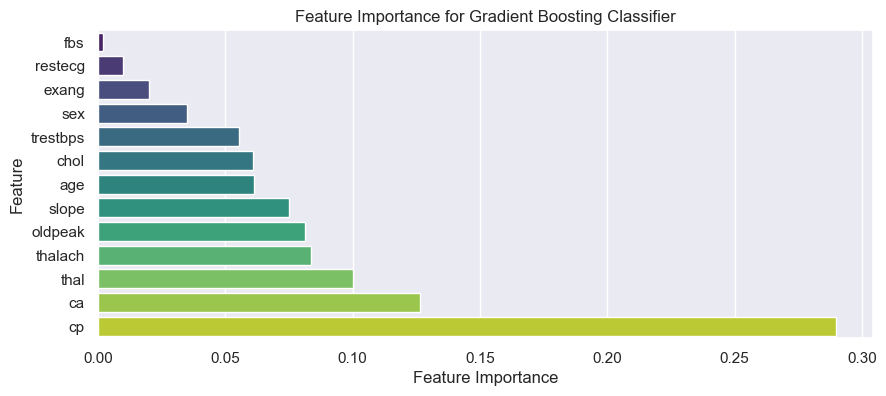

KNN Classifier
Training data accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.56      1.00      0.72        33

    accuracy                           0.57        61
   macro avg       0.78      0.54      0.43        61
weighted avg       0.76      0.57      0.45        61



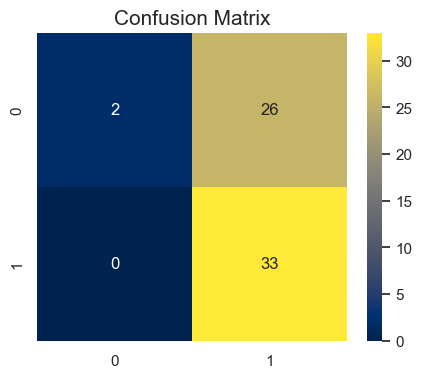

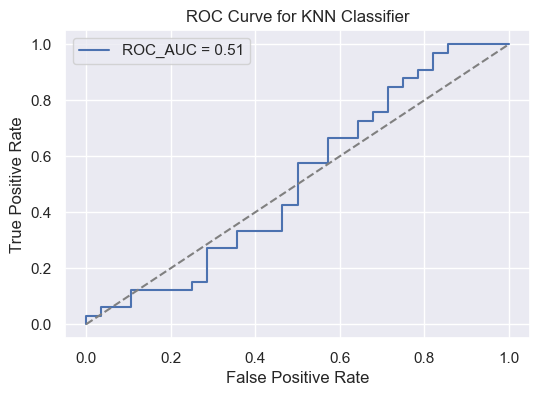

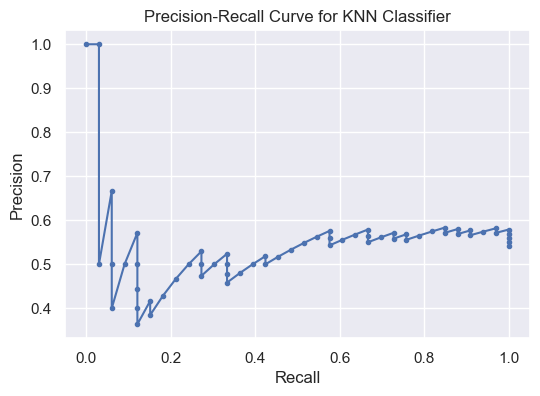

Gaussian Naive Bayes Classifier
Training data accuracy: 0.8423236514522822

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.21      0.26        28
           1       0.49      0.64      0.55        33

    accuracy                           0.44        61
   macro avg       0.41      0.43      0.41        61
weighted avg       0.42      0.44      0.42        61



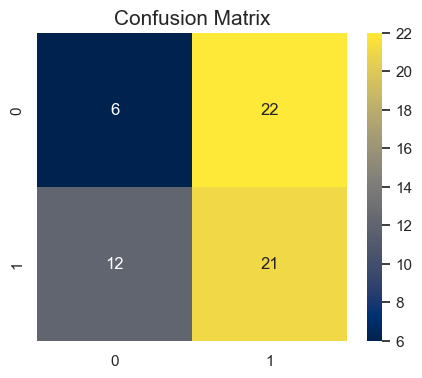

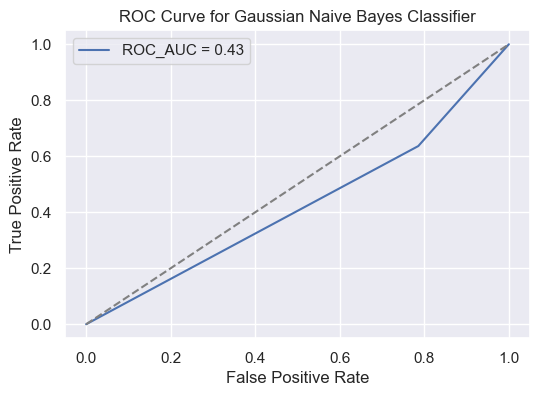

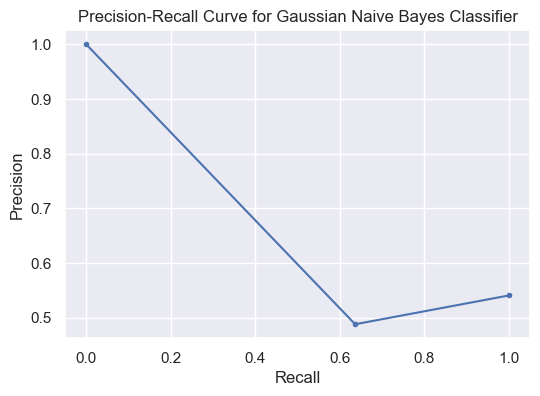

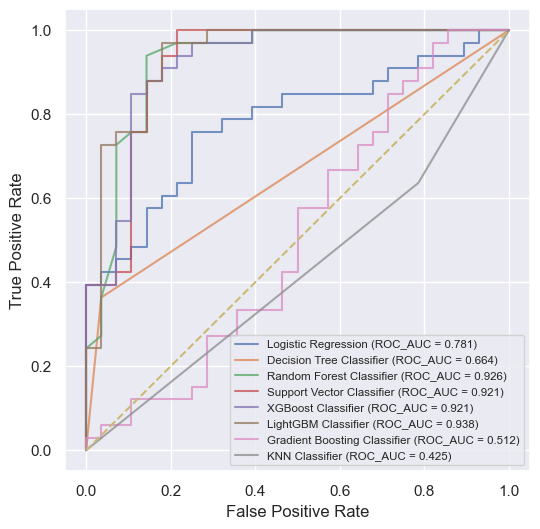

,Model,ACC,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Kappa,MCC
2,Random Forest Classifier,1.000000,0.852459,0.875000,0.848485,0.861538,0.926407,0.703724,0.704105
6,Gradient Boosting Classifier,0.995851,0.836066,0.870968,0.818182,0.843750,0.938312,0.671690,0.673143
5,LightGBM Classifier,1.000000,0.786885,0.884615,0.696970,0.779661,0.920996,0.578864,0.594347
1,Decision Tree Classifier,1.000000,0.639344,0.923077,0.363636,0.521739,0.663961,0.311088,0.399038
4,XGBoost Classifier,1.000000,0.639344,0.866667,0.393939,0.541667,0.920996,0.307534,0.373212
7,KNN Classifier,1.000000,0.573770,0.559322,1.000000,0.717391,0.511905,0.076834,0.199879
0,Logistic Regression,0.850622,0.475410,1.000000,0.030303,0.058824,0.781385,0.027888,0.118918
3,Support Vector Classifier,0.850622,0.459016,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
8,Gaussian Naive Bayes Classifier,0.842324,0.442623,0.488372,0.636364,0.552632,0.425325,-0.153504,-0.163182


In [318]:
model_performance(models)

In [319]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100).tolist(),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': np.arange(2, 11, 2).tolist(),
    'min_samples_leaf': np.arange(1, 5).tolist(),
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

In [217]:
rf = RandomForestClassifier(random_state=52)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=52)

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)

In [165]:
# Print Best Parameters & Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
Best Accuracy Score: 0.8959077959077959


In [322]:
# Print Best Model
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200, random_state=52)

In [323]:
# Load Tuned Model
model = RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200, random_state=52)

In [324]:
# Test Performance Scores on Testing Set
performance_score(model)

,MCC,ROC-AUC,Kappa,ACC,Accuracy,Precision,Recall,F1
0,0.768734,0.942641,0.768313,0.946058,0.885246,0.882353,0.909091,0.895522


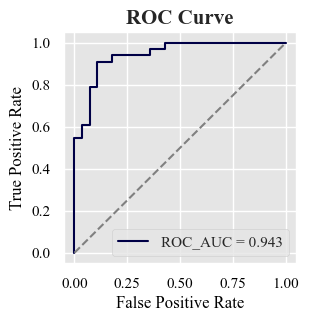

In [392]:
# ROC Curve
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.style.use('ggplot')
plt.figure(figsize=(3, 3), dpi=100)
plt.rcParams['font.family'] = 'Times New Roman'

plt.plot(fpr, tpr, label='ROC_AUC = {:.3f}'.format(roc_auc_score(y_test, y_pred_proba)), color='#000046')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve', size=15, fontweight='bold')
plt.xlabel('False Positive Rate', color='#000000')
plt.ylabel('True Positive Rate', color='#000000')
plt.xticks(color='#000000')
plt.yticks(color='#000000')
plt.legend()

plt.show()

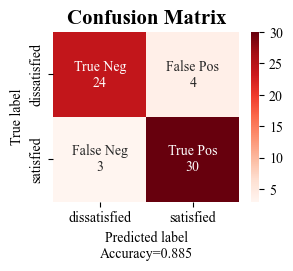

In [393]:
# Confusion Matrix
from matplotlib.colors import LinearSegmentedColormap
plt.style.use('default')
plt.figure(figsize=(3, 2.2))
plt.rcParams['font.family'] = 'Times New Roman'

cm = confusion_matrix(y_test, y_pred)
custom_labels = np.array([[f'True Neg\n{cm[0, 0]}', f'False Pos\n{cm[0, 1]}'],
                          [f'False Neg\n{cm[1, 0]}', f'True Pos\n{cm[1, 1]}']])

sns.heatmap(cm, annot=custom_labels, fmt='', cmap='Reds',
            xticklabels=['dissatisfied', 'satisfied'], 
            yticklabels=['dissatisfied', 'satisfied'])

plt.title('Confusion Matrix', size=15, fontweight='bold')
plt.xlabel(f'Predicted label\nAccuracy={accuracy_score(y_test, y_pred):.3f}')
plt.ylabel('True label')

#plt.savefig('Confusion_matrix_lgbm', bbox_inches='tight', dpi=1000)
plt.show()

In [338]:
# Create a DataFrame of Feature Importance
vip = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

vip

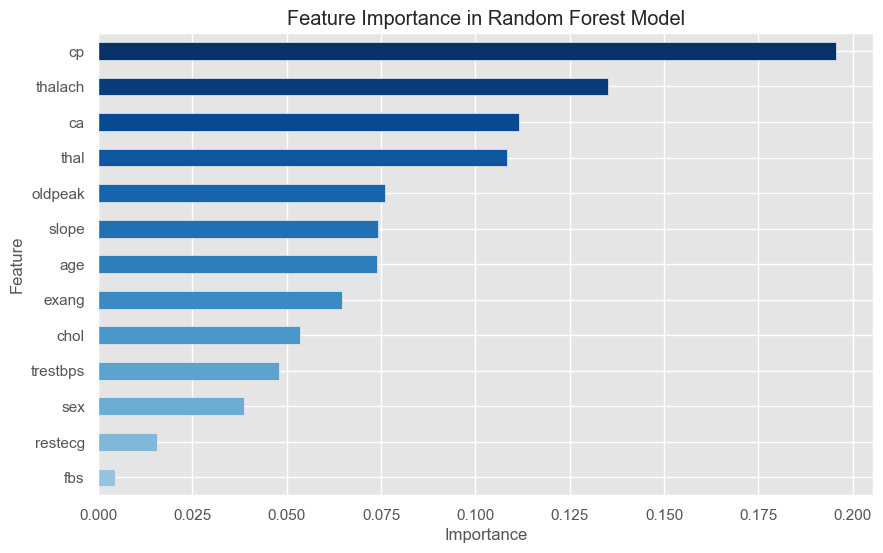

In [359]:
# Plot Feature Importances
vip.plot(kind='barh', x='Feature', y='Importance', legend=False, color = plt.cm.Blues_r(np.linspace(0, 0.6, len(vip))), figsize=(10, 6))
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [362]:
# Save the model
joblib.dump(model, "E:/Heart_Disease_Prediction.pkl")

['E:/Heart_Disease_Prediction.pkl']

In [363]:
# Load Saved Model
rf_model = joblib.load("E:/Heart_Disease_Prediction.pkl")

In [365]:
# Confirming the Saved Model
performance_score(rf_model)

,MCC,ROC-AUC,Kappa,ACC,Accuracy,Precision,Recall,F1
0,0.768734,0.942641,0.768313,0.946058,0.885246,0.882353,0.909091,0.895522
